In [1]:
import numpy as np 
import pandas as pd 

# PLOT
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
%matplotlib inline

### Importing dataset

In [3]:
# Importing the dataset
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Dropped the duplicate
train_df.drop(columns=["row_id"], inplace=True)
y = train_df['target']
X = train_df.drop(columns=['target'])

# Label Encoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# Dataset Spliting for training/ testing set
from sklearn.model_selection import train_test_split
X_train, X_valid , y_train , y_valid = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [5]:
def check(df):
    col_list = df.columns.values
    rows = []
    for col in col_list:
        tmp = (col,
              df[col].dtype,
              df[col].isnull().sum(),
              df[col].count(),
              df[col].nunique(),
              df[col].unique())
        rows.append(tmp)
    df = pd.DataFrame(rows) 
    df.columns = ['feature','dtype','nan','count','nunique','unique']
    return df

check(train_df)

,feature,dtype,nan,count,nunique,unique
0,A0T0G0C10,float64,0,200000,18,"[-9.5367431640625e-07, 4.632568359374996e-08, ..."
1,A0T0G1C9,float64,0,200000,23,"[-9.5367431640625e-06, -1.5367431640625004e-06..."
2,A0T0G2C8,float64,0,200000,139,"[-4.291534423828125e-05, 7.084655761718752e-06..."
3,A0T0G3C7,float64,0,200000,683,"[-0.0001144409179687, 0.0008855590820312, 0.00..."
4,A0T0G4C6,float64,0,200000,1279,"[-0.0002002716064453, 0.0002677283935546, 0.00..."
...,...,...,...,...,...,...
282,A9T0G0C1,float64,0,200000,354,"[-9.5367431640625e-06, 1.0463256835937502e-05,..."
283,A9T0G1C0,float64,0,200000,509,"[-9.5367431640625e-06, 8.4632568359375e-06, 1...."
284,A9T1G0C0,float64,0,200000,515,"[-9.5367431640625e-06, 1.94632568359375e-05, 4..."
285,A10T0G0C0,float64,0,200000,22,"[-9.5367431640625e-07, 1.04632568359375e-06, 6..."


In [9]:
feature = [col for col in train_df.columns if col not in ['row_id', 'target']]

In [10]:
for col in feature:
    train_df[col] = train_df[col].astype("float32")
    test_df[col] = test_df[col].astype("float32")

In [11]:
n = len(feature)
fb = []
r = []
for i in range(n):
    a = feature[i]
    if a[0] == 'A' and a[1] == '1' and a[2] == 'T' and a[3] == '1'  and a[4] == 'G' and int(a[5]) > 0:
        fb.append(a)
        r.append(i)
        
print(fb,r, len(r))

['A1T1G1C7', 'A1T1G2C6', 'A1T1G3C5', 'A1T1G4C4', 'A1T1G5C3', 'A1T1G6C2', 'A1T1G7C1', 'A1T1G8C0'] [77, 78, 79, 80, 81, 82, 83, 84] 8


NameError: name 'f' is not defined

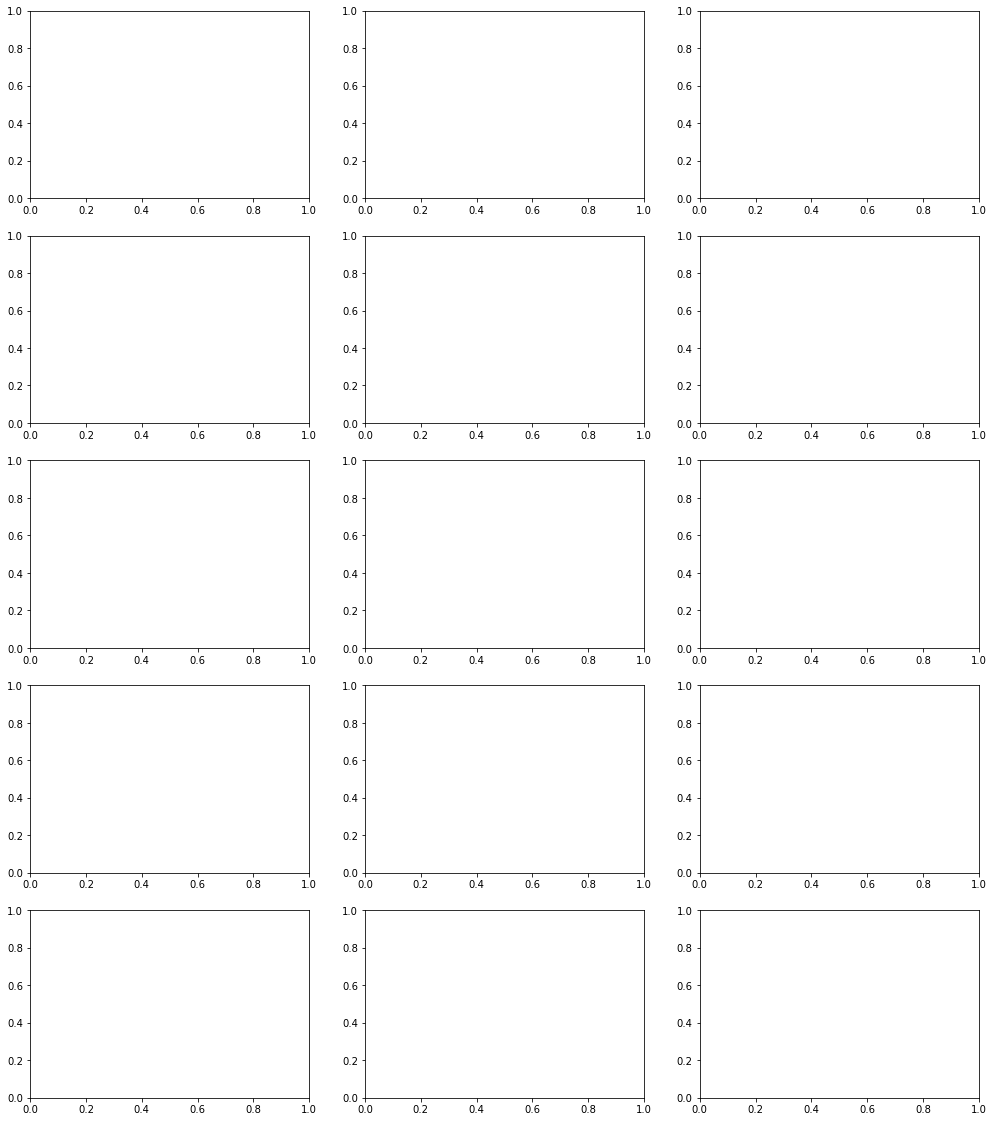

In [6]:
fig, axs = plt.subplots(5, 3, figsize=(17,20))
i = 0
for f in f:
    current_ax = axs.flat[i]
    current_ax.hist(train_df[f], bins=100)
    current_ax.set_title(f)
    current_ax.grid()
    i = i + 1